In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Import necessary libraries
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load and preprocess the MNIST dataset
print("Step 1: Loading and preparing the MNIST dataset...")
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data - flatten 28x28 images to a 784 vector for each image
X_train = X_train.reshape((-1, 28*28))
X_test = X_test.reshape((-1, 28*28))

Step 1: Loading and preparing the MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Step 2: Create the Neural Network Model
print("\nStep 2: Building the Neural Network...")
model = keras.Sequential([
    # Input layer: 784 neurons (28x28 pixels)
    layers.Input(shape=(784,)),

    # First hidden layer: 128 neurons with ReLU activation
    # ReLU is used because it helps prevent vanishing gradient problem
    layers.Dense(128, activation='relu'),

    # Second hidden layer: 64 neurons with ReLU activation
    layers.Dense(64, activation='relu'),

    # Output layer: 10 neurons (one for each digit) with softmax activation
    # Softmax ensures outputs are probabilities that sum to 1
    layers.Dense(10, activation='softmax')
])


Step 2: Building the Neural Network...


In [4]:
# Step 3: Compile the model
print("\nStep 3: Compiling the model...")
model.compile(
    optimizer='adam',  # Adam optimizer is a good default choice
    loss='sparse_categorical_crossentropy',  # Appropriate for classification tasks
    metrics=['accuracy']  # We want to track accuracy
)


Step 3: Compiling the model...


In [5]:
# Step 4: Train the model
print("\nStep 4: Training the model...")
history = model.fit(
    X_train, y_train,
    epochs=5,  # Number of training iterations
    batch_size=32,  # Number of samples per gradient update
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1
)


Step 4: Training the model...
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8588 - loss: 0.4828 - val_accuracy: 0.9583 - val_loss: 0.1436
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9644 - loss: 0.1193 - val_accuracy: 0.9687 - val_loss: 0.1063
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9768 - loss: 0.0766 - val_accuracy: 0.9687 - val_loss: 0.1079
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9827 - loss: 0.0578 - val_accuracy: 0.9722 - val_loss: 0.0958
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9878 - loss: 0.0400 - val_accuracy: 0.9740 - val_loss: 0.0958


In [6]:
# Step 5: Evaluate the model
print("\nStep 5: Evaluating the model...")
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")


Step 5: Evaluating the model...
Test accuracy: 0.9755



Step 6: Making predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


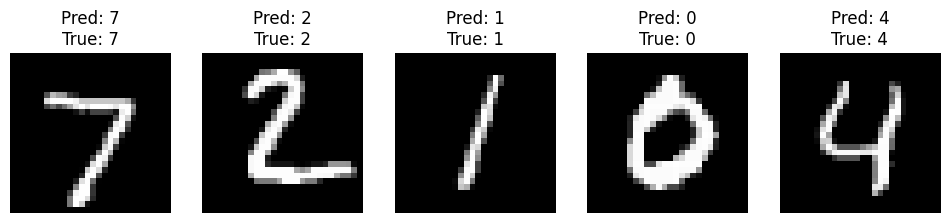

In [7]:
# Step 6: Visualize some predictions
print("\nStep 6: Making predictions...")
predictions = model.predict(X_test[:5])
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    ax.set_title(f'Pred: {predicted_label}\nTrue: {true_label}')
    ax.axis('off')
plt.show()

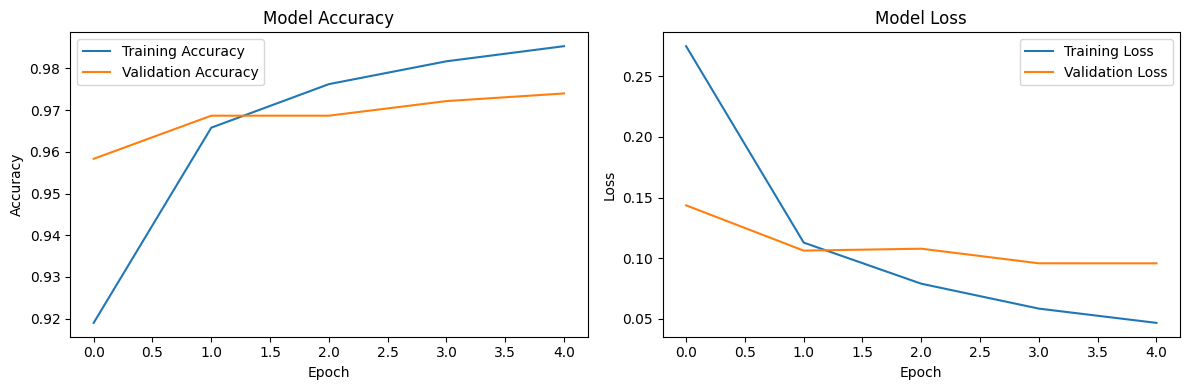

In [8]:
# Step 7: Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()